In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
A_x = np.loadtxt('/home/juan/Documents/Aerodynamics_Course_GW/AeroPython/lessons/resources/NACA0012_x.txt')
A_y = np.loadtxt('/home/juan/Documents/Aerodynamics_Course_GW/AeroPython/lessons/resources/NACA0012_y.txt')
A_sigma = np.loadtxt('/home/juan/Documents/Aerodynamics_Course_GW/AeroPython/lessons/resources/NACA0012_sigma.txt')
np.shape(A_y)

(100,)

In [3]:
N = 51
x_start, x_end = -1.0, 2.0
y_start, y_end = -0.5, 0.5
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,N)
X, Y = np.meshgrid(x,y)
np.shape(X)

(51, 51)

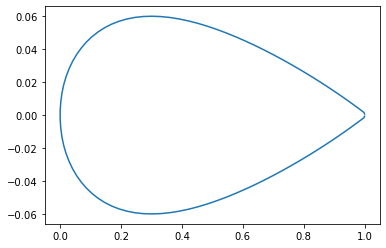

In [4]:
U_inf = 1.0
u_freestream = U_inf * np.ones((N,N),dtype=float)
v_freestream = np.zeros((N,N),dtype = float)
psi_freestream = U_inf * Y
plt.plot(A_x,A_y);

In [5]:
def get_velocity(strength,X,Y,xs,ys):
    """
    Returns the velocity field of a source/sink.
    Parameters
    -----------
    strength: float
    xs: float
    ys: float
    X: 2D array
    Y: 2D array
    
    Returns
    --------------
    u = 2D array of x velocity field
    v = 2D array of y velocity field
    """
    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

In [6]:
def get_stream(strength, xs, ys, X, Y):
    """
    Returns the stream-function of the source/sink
    
    Parameters
    -----------
    strength: float
    xs=float
    ys=float
    X = 2D array
    Y = 2D array
    
    Returns
    --------
    psi: 2D stream-function
    """
    psi = strength / (2 * np.pi) * np.arctan2((Y-ys),(X-xs))
    return psi

In [7]:
def plot_fig(width):
    height = (y_end - y_start) / (x_end - x_start) * width
    fig = plt.figure(figsize=(width, height))
    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    plt.xlim(x_start, x_end)
    plt.ylim(y_start, y_end)
    return fig
    

In [8]:
#source
strength_source = 1.5
x_source, y_source = 0.0, 0.0
u_source, v_source = get_velocity(strength_source,X,Y,x_source,y_source)
psi_source = get_stream(strength_source,x_source,y_source,X,Y)
#sink 
strength_sink = -0.2
x_sink, y_sink = 1.0, 0.0
u_sink,v_sink = get_velocity(strength_sink,X,Y,x_sink,y_sink)
psi_sink = get_stream(strength_sink,x_sink,y_sink,X,Y)

#Airfoil
u_air,v_air = get_velocity(A_sigma,X,Y,A_x,A_y)

## Superposition
#u = u_source + u_sink + u_freestream
#v = v_source + v_sink + v_freestream
#psi = psi_source + psi_sink + psi_freestream

# plotting
fig = plot_fig(10)
plt.plot(A_x,A_y,color='black')
plt.grid(True)
plt.streamplot(X,Y,u,v);
plt.contour(X,Y,psi,colors='r',linestyles='solid',levels=[0.]);

ValueError: operands could not be broadcast together with shapes (51,51) (100,) 

In [9]:
u_1 = np.zeros((N,N),dtype=float)
v_1 = np.zeros((N,N),dtype=float)
psi_1 = np.zeros((N,N),dtype=float)
for i in range(len(A_sigma)):
    u_a,v_a = get_velocity(A_sigma[i],X,Y,A_x[i],A_y[i])
    psi_a = get_stream(A_sigma[i],A_x[i],A_y[i],X,Y)
    u_1 = u_a + u_1
    v_1 = v_a + v_1
    psi_1 = psi_a + psi_1

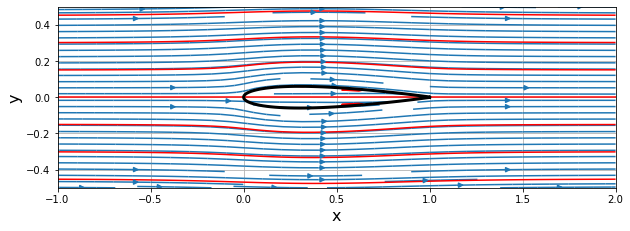

In [10]:
u = u_1 + u_freestream
v = v_1 + v_freestream
psi = psi_1 + psi_freestream
fig=plot_fig(10)
plt.grid(True);
plt.streamplot(X,Y,u,v)
plt.contour(X,Y,psi,linestyles='solid',colors='r');
plt.plot(A_x,A_y,color='black',linewidth=3);

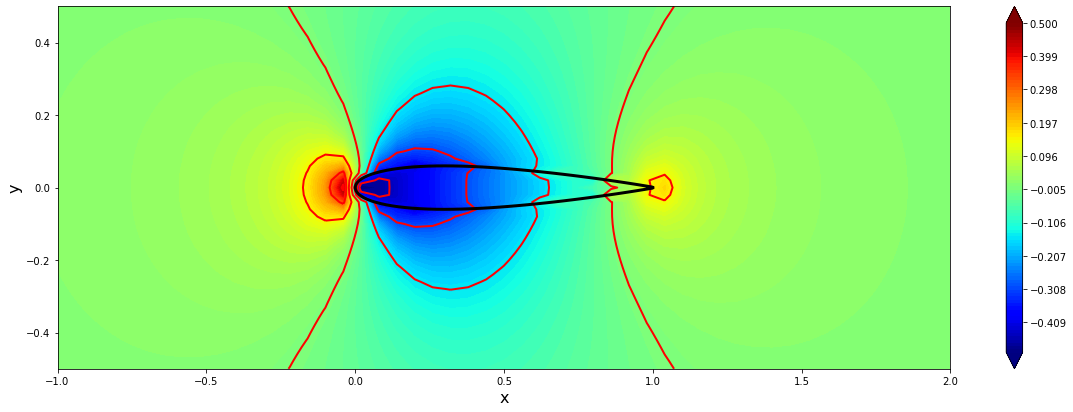

In [23]:
cp = 1.0 - ((u**2 + v**2)) / U_inf**2
#plot
fig_2 = plot_fig(20)
contf=plt.contourf(X,Y,cp,levels=np.linspace(-0.5,0.5,100),extend='both',cmap='jet');
cbar=plt.colorbar(contf)
plt.contour(X,Y,cp,colors='r',linestyles='solid',linewidths=2)
plt.plot(A_x,A_y,color='black',linewidth=3);

In [19]:
mx = np.max(cp)
mn = np.min(cp)
ind=np.where(cp==mx)
print('maximum value of cp is ',mx ,' and its position is ',ind)

maximum value of cp is  0.4714436613316241  and its position is  (array([25]), array([16]))


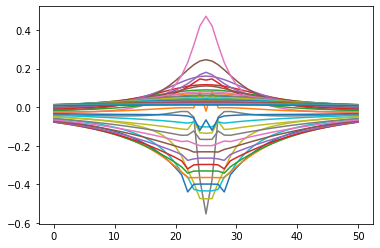

In [14]:
np.shape(cp)
#fig = plot_fig(10)
#cp_1 = np.reshape(cp,[1,2500])
plt.plot(cp);

In [ ]:
cp[25,16]